In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

## Merging csv files

In [74]:
joined_files = os.path.join('/Users/zuzannakilar/PycharmProjects/pythonProject/jobs_data_exp_lvl', 'jobs_data*.csv')
joined_files

'/Users/zuzannakilar/PycharmProjects/pythonProject/jobs_data_exp_lvl/jobs_data*.csv'

In [75]:
joined_list = glob.glob(joined_files)
joined_list

['/Users/zuzannakilar/PycharmProjects/pythonProject/jobs_data_exp_lvl/jobs_data_mid.csv',
 '/Users/zuzannakilar/PycharmProjects/pythonProject/jobs_data_exp_lvl/jobs_data_senior.csv',
 '/Users/zuzannakilar/PycharmProjects/pythonProject/jobs_data_exp_lvl/jobs_data_junior.csv']

In [76]:
df = pd.concat(map(pd.read_csv, joined_list))

In [77]:
df.head()

,Title,Company,Location,Salary,Skills,Experience level
0,Back-End Engineer (scala),relayr sp. z o.o.,Remote,9 000 - 19 500 PLN,java python scala,Mid
1,Full Stack Engineer (NodeJS/React) (m/f/d),relayr sp. z o.o.,"Remote, Katowice",10 000 - 19 200 PLN,javascript REST Node.js,Mid
2,Citrix Engineer,ING Bank Śląski,"Remote, Warszawa, Katowice",10 500 - 15 000 PLN,hardware konfiguracja utrzymanie wymiana,Mid
3,.NET Developer,7N,Warszawa,15 900 - 21 000 PLN,.NET C# .NET Core,Mid
4,Storage Specialist,Kyndryl,"Remote, Wrocław",NaN,,Mid


In [78]:
df.shape

(1521, 6)

## Data cleaning

### NA values

In [7]:
df.isna().sum()

Title                  0
Company                0
Location               0
Salary              1008
Skills                 0
Experience level       0
dtype: int64

### Handling duplicates

In [9]:
duplicates_df = df[df.duplicated()]
duplicates_df.head(5)

,Title,Company,Location,Salary,Skills,Experience level
50,Back-End Engineer (scala),relayr sp. z o.o.,Remote,9 000 - 19 500 PLN,java python scala,Mid
51,Full Stack Engineer (NodeJS/React) (m/f/d),relayr sp. z o.o.,"Remote, Katowice",10 000 - 19 200 PLN,javascript REST Node.js,Mid
52,Citrix Engineer,ING Bank Śląski,"Remote, Warszawa, Katowice",10 500 - 15 000 PLN,hardware konfiguracja utrzymanie wymiana,Mid
53,.NET Developer,7N,Warszawa,15 900 - 21 000 PLN,.NET C# .NET Core,Mid
54,Storage Specialist,Kyndryl,"Remote, Wrocław",NaN,,Mid


In [10]:
duplicates_df.shape

(186, 6)

In [79]:
df = df.drop_duplicates()

In [80]:
df.shape

(1335, 6)

### Replacing insignificant values

#### Salary column

In [ ]:
df['Salary [PLN]'].unique()

In [ ]:
df['Salary'] = df['Salary'].replace('4 000 - 4 600 EUR', '18425.47 - 21189.29 PLN')

In [ ]:
# Get rid of PLN because all salary is in PLN so adding PLN into column name
df['Salary'] = df['Salary'].str[:-4]

In [ ]:
# Rename column name SALARY to SALARY [PLN]
df.rename(columns = {'Salary':'Salary [PLN]'}, inplace = True)

In [ ]:
df = df.astype({"Salary [PLN]": str}, errors='raise')

In [ ]:
df['Salary [PLN]'] = df['Salary [PLN]'].str.replace(" ", "")

In [86]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Znamywid', np.nan) 

In [87]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Od4000', '4000')

In [88]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do20000', '20000')

In [89]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do22000', '22000')

In [90]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do36000', '36000')

In [91]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do20800', '20800')

In [92]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do17000', '17000')

In [93]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do10000', '10000')

In [94]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do23500', '23500')

In [95]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do24500', '24500')

In [96]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('Do24600', '24600')

In [97]:
df['Salary [PLN]'] = df['Salary [PLN]'].replace('nan', np.nan)

In [ ]:
df[['Low salary range', 'High salary range']] = df['Salary [PLN]'].str.split('-', expand=True)

In [ ]:
df['High salary range'] = df['High salary range'].astype(float)
df['Low salary range'] = df['Low salary range'].astype(float)

In [ ]:
df['Average salary'] = df[['High salary range', 'Low salary range']].mean(axis=1)

In [ ]:
df = df.drop(['Salary [PLN]', 'Low salary range', 'High salary range'], axis=1)

In [ ]:
salary_provided = df[df['Average salary'].notnull()]

In [ ]:
salary_provided.shape

#### Skills column

In [84]:
df['Skills'].unique()

In [85]:
df['Skills'] = df['Skills'].str.strip()

In [ ]:
df['Skills'] = df['Skills'].replace(['Możliwość zmiany projektu',
                                     'Zrób następny krok w swoim rozwoju',
                                     'Rozmowa tech. na pierwszym spotkaniu',
                                     'Śr. czas pracy u nas to 4 lata!',
                                     'System Dozoru Elektronicznego', 
                                     'autorski produkt',
                                     '100% remote work',
                                     'One Day Recruitment',
                                     'Zróżnicowane projekty 100% zdalnie',
                                     'Project for Scandinavian automotive.',
                                     "We're looking for Cloud Guru.",
                                     'nowoczesny stack i projekt z misją',
                                     'przełomowy produkt w branży automotive',
                                     'mocny zespół, projekty z US',
                                     'Possibility working abroad (60days/year)',
                                     'projekt tworzony wewnętrznie od początku',
                                     'Join us to fulfill your Potential!',
                                     'Możliwość wyboru projektu', 
                                     'You build it you run it',
                                     'Tworzymy transport przyszłości.',
                                     'autorski produkt',
                                     'Mały zespół, fajna atmosfera.'
                                     'for Smart Buildings',
                                     'Java   Spring   REST', 'Media production platform',
                                     'cybersecurity products', 
                                     'Augmented Reality project', 
                                     'construction industry',
                                     '#migrationanalyst', 
                                     'Praca zdalna', 
                                     'Systemy klasy enterprise', 
                                     'Test automation, continuous development',
                                     'Entertainment | Online media',
                                     'Let’s get to work on your next project!',
                                     'Analityk', 'mikroserwisy', 
                                     'VR startup z USA | polskie godziny pracy', 
                                     '80% rozwijanie; 20% utrzymanie',
                                     'System pomiaru i analizy oglądalności TV',
                                     '#businessanalyst',
                                     'Budowa nowego systemu Assistance', 
                                     'hardware konfiguracja utrzymanie wymiana',
                                     'great opportunity to grow', ''], np.nan)

## Data exploration & analysis

### Which company has the most ads?

In [110]:
the_most_ads = df.groupby('Company')['Company'].count().sort_values(ascending=False).head(10)
the_most_ads

Company
Luxoft Poland                                           408
Commerzbank - Centrum Technologii Cyfrowych w Polsce     81
Power Media                                              61
Sii Polska                                               54
Transition Technologies PSC S.A.                         41
Bank Millennium                                          41
ONWELO SA                                                37
PKO BP Finat                                             32
Sapiens Software Solutions Poland Sp. z o.o.             30
Hitachi Energy                                           27
Name: Company, dtype: int64

### Which company has the most job offers with salary?

In [121]:
salary_provided.groupby('Company')['Company'].count().sort_values(ascending=False)

Company
ONWELO SA                           36
Hitachi Energy                      27
Sii Polska                          20
7N                                  17
Be | Shaping the Future Poland      13
                                    ..
Rumble Fish Software Development     1
STRIX                                1
Felder Group Polska Sp. z o.o.       1
EuroLinux Sp. z o. o.                1
23Knots                              1
Name: Company, Length: 85, dtype: int64

### Experience level 

In [123]:
junior = salary_provided[salary_provided['Experience level'] == 'Junior'].count()
junior['Experience level']

23

In [124]:
mid = salary_provided[salary_provided['Experience level'] == 'Mid'].count()
mid['Experience level']

194

In [125]:
senior = salary_provided[salary_provided['Experience level'] == 'Senior'].count()
senior['Experience level']

107

### What is an average salary per experience level?

In [113]:
avg_sal_per_exp_lvl = salary_provided.groupby('Experience level')['Average salary'].mean()
round(avg_sal_per_exp_lvl, 2)

Experience level
Junior     8021.74
Mid       30980.29
Senior    20126.17
Name: Average salary, dtype: float64

### Outlier handling

Text(0.5, 0, '')

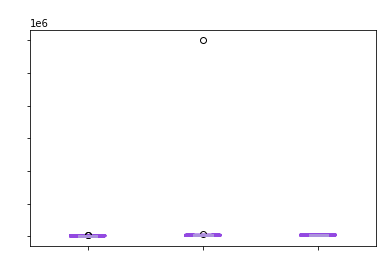

In [114]:
boxprops = dict(linestyle='-',
                linewidth=3,
                color='#9349E1')

whiskerprops = dict(color='black',
                    linewidth=1.5,
                    linestyle=':')

medianprops = dict(color='#AC92DD', linewidth=3)

salary_provided.boxplot(column='Average salary', by='Experience level', grid=False, notch=True,
                       boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)
plt.title('')
plt.suptitle(t='Boxplot grouped by experience level', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('')
# 1e6 = n * 10 ** 6

In [115]:
np.where(salary_provided['Average salary']>3_000_000)

(array([125]),)

In [116]:
salary_provided.iloc[125]

Title                                 Devops Engineer
Company                                            7N
Location                                     Warszawa
Skills                Kubernetes   Docker   Ansible  
Experience level                                  Mid
Average salary                              3008000.0
Name: 658, dtype: object

In [117]:
# Get rid of ambiguous value in mid
salary_provided = salary_provided.drop(labels=658, axis=0)

Text(0.5, 0, '')

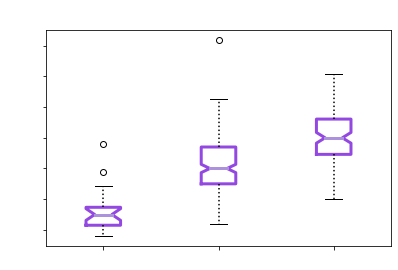

In [118]:
boxprops = dict(linestyle='-',
                linewidth=3,
                color='#9349E1')

whiskerprops = dict(color='black',
                    linewidth=1.5,
                    linestyle=':')

medianprops = dict(color='#AC92DD', linewidth=3)

salary_provided.boxplot(column='Average salary', by='Experience level', grid=False, notch=True,
                       boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)
plt.title('')
plt.suptitle(t='Boxplot grouped by experience level', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('')

In [122]:
avg_sal_per_exp_lvl = salary_provided.groupby('Experience level')['Average salary'].mean()
round(avg_sal_per_exp_lvl, 2)

Experience level
Junior     8021.74
Mid       15634.83
Senior    20126.17
Name: Average salary, dtype: float64